In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
#Confusion Matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

Descargar datos / Download Data CIFAR10

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


Ver al estrucutra de los datos / Check data shape

In [3]:
#print the structure of data
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(train_labels[1])


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
[9]


Vemos algunas imágenes / Check some examples

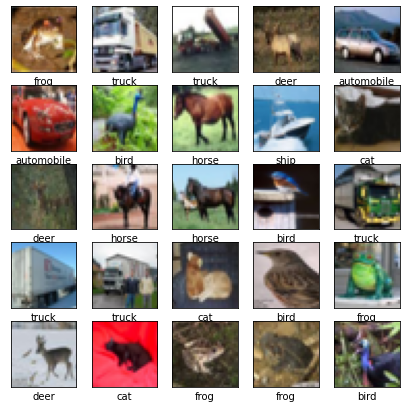

In [4]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(7,7))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


Definir los modelos de redes de neuronas PM / Define MLP model




In [ ]:
def create_simple_pm():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(layers.Dense(20, activation='sigmoid', name="Hidden_layer1"))
  model.add(layers.Dense(20, activation='sigmoid', name="Hidden_layer2"))
  model.add(layers.Dense(20, activation='sigmoid', name="Hidden_layer3"))
  model.add(tf.keras.layers.Dense(10, activation='softmax', name="Output_layer"))
  return model


Definir los modelos de redes de neuronas CNN / Define Convolutional Network model

In [ ]:
def create_model_simple_cnn():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(16, (3, 3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

Modelo CNN con DropOut / Convolutional model with DropOut


In [5]:
def create_model_dropout_cnn():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(64, (3,3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3,3), activation='relu',padding='same'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Flatten())
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(50, activation='relu'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(10, activation='softmax'))
  return model

Modelo PM con DropOut / MLP model with DropOut

In [ ]:
def create_model_dropout_pm():
  model = models.Sequential()
  model.add(layers.BatchNormalization(input_shape=(32, 32, 3)))
  model.add(layers.Flatten(input_shape=(32, 32, 3), name="Input_layer"))
  model.add(layers.Dense(500, activation='relu', name="Hidden_layer1"))
  model.add(layers.Dense(500, activation='relu', name="Hidden_layer2"))
  model.add(layers.Dense(500, activation='relu', name="Hidden_layer3"))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(10, activation='softmax', name="Output_layer"))

  return model

Crear y visualizar el modelo / Create and visualize the model

In [6]:
model = create_model_dropout_cnn() 
#model = create_model_dropout_pm()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 32, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        


Compilar el modelo / Compile model

In [7]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
  loss='sparse_categorical_crossentropy'
  ,
  metrics=['sparse_categorical_accuracy'])

Entrenamos el modelo / Train the model

In [8]:
historico =  model.fit(train_images, train_labels, epochs=10, validation_freq=1,
  validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 333s 213ms/step - loss: 1.6139 - sparse_categorical_accuracy: 0.3980 - val_loss: 1.1674 - val_sparse_categorical_accuracy: 0.5846
Epoch 2/10
1563/1563 [==============================] - 335s 215ms/step - loss: 1.2036 - sparse_categorical_accuracy: 0.5757 - val_loss: 0.9736 - val_sparse_categorical_accuracy: 0.6677
Epoch 3/10
1563/1563 [==============================] - 329s 211ms/step - loss: 1.0328 - sparse_categorical_accuracy: 0.6400 - val_loss: 0.8608 - val_sparse_categorical_accuracy: 0.7089
Epoch 4/10
1563/1563 [==============================] - 326s 209ms/step - loss: 0.9261 - sparse_categorical_accuracy: 0.6840 - val_loss: 0.8129 - val_sparse_categorical_accuracy: 0.7284
Epoch 5/10
1563/1563 [==============================] - 335s 214ms/step - loss: 0.8510 - sparse_categorical_accuracy: 0.7082 - val_loss: 0.7696 - val_sparse_categorical_accuracy: 0.7376
Epoch 6/10
1563/1563 [==============================] - 327s 210ms/ste

Generar plots de evolución del entrenamiento / Show training evolution


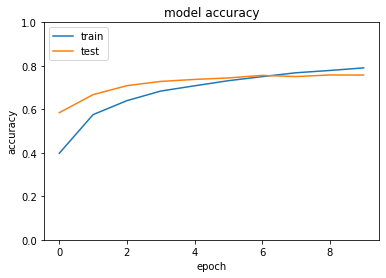

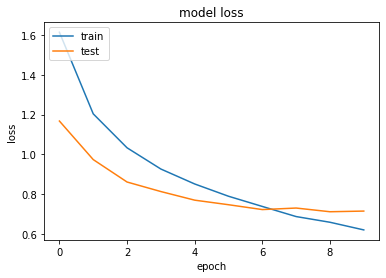

In [9]:
# muestra historico de accuracy
plt.plot(historico.history['sparse_categorical_accuracy'])
plt.plot(historico.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

# muestra histórico de loss
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluar el modelo y obtener predicciones / Test model and obtain predictions


In [10]:
evaluacion=model.evaluate(test_images, test_labels)


313/313 [==============================] - 16s 51ms/step - loss: 0.7147 - sparse_categorical_accuracy: 0.7576


Predicciones en bruto

In [11]:
#predicciones en bruto:
raw_testPred = model.predict(test_images)
#prediccion en bruto de los 5 primeros patrones de test: 5 vectores de valores reales
print(raw_testPred[:5])

[[4.4493708e-03 4.1357012e-04 1.8438946e-02 7.0686740e-01 9.4650667e-03
  2.1461308e-01 1.7590774e-02 9.2913657e-03 1.6140876e-02 2.7296357e-03]
 [1.2989904e-04 7.1505183e-01 8.7034074e-08 1.5880800e-11 1.5154664e-11
  2.5494830e-13 2.6111526e-09 4.6734864e-12 2.8471076e-01 1.0742299e-04]
 [4.2793356e-02 1.2836508e-03 5.4768967e-03 4.2592996e-04 7.3380838e-04
  3.8624145e-05 1.5175751e-04 4.0664407e-05 9.4740742e-01 1.6478889e-03]
 [1.7239070e-01 1.2609150e-04 1.6207740e-02 1.0307179e-04 3.4900845e-04
  6.5215982e-06 9.4275922e-05 3.2020948e-06 8.1066185e-01 5.7538495e-05]
 [1.2991551e-09 1.4266728e-07 6.6833883e-05 2.3543640e-04 3.6254776e-05
  8.4443536e-06 9.9965286e-01 6.2366257e-10 3.9849990e-09 3.3609663e-08]]


Predicciones y matriz de confusión / Predictions and confusion matrix

In [12]:
#predicciones de la clase:
class_testPred = np.argmax(raw_testPred, axis=1)
#predicción de la clase de los 10 primeros patrones de test
print(class_testPred[:20]) #predicciones
print(test_labels[:20,0]) #valores esperados

#Confusion Matrix
cm=confusion_matrix(test_labels, class_testPred)
print(cm)

[3 1 8 8 6 6 1 4 3 1 0 9 4 7 9 8 5 9 8 6]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
[[852   9  28  19   7   1   6   1  43  34]
 [ 10 822   2   6   3   2   4   0  22 129]
 [ 92   4 630  53  91  29  59  14  17  11]
 [ 32   6  72 584  71  95  67  17  23  33]
 [ 32   2  65  48 740   7  50  45   8   3]
 [ 14   1  45 225  57 572  25  28  13  20]
 [  6   3  27  59  46   3 833   3  10  10]
 [ 16   2  34  46  65  29   4 765   9  30]
 [ 68  19   6   6   6   1   2   1 870  21]
 [ 26  30   1  10   1   2   2   4  16 908]]


Guardamos ficheros / Store files on Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#guardar resultados
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/evaluacion.txt',evaluacion,newline='\t')
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/historicoTrainLoss.txt',historico.history['loss'])
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/historicoTestLoss.txt',historico.history['val_loss'])
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/historicoTrainAcc.txt',historico.history['sparse_categorical_accuracy'])
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/historicoTestAcc.txt',historico.history['val_sparse_categorical_accuracy'])
# guardar matriz de confusión
np.savetxt('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Resultados/CNN/Bueno1/matrizConf.txt', cm, fmt='%-3d')

Guardar modelo / Store model

In [ ]:
#guarda el modelo completo
model.save('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Modelos/CNN/Bueno1/modelo.h5')
#guarda solo pesos
model.save_weights('/content/drive/MyDrive/RedesDeNeuronasP2/Parte 2/Modelos/CNN/Bueno1/pesos.h5')